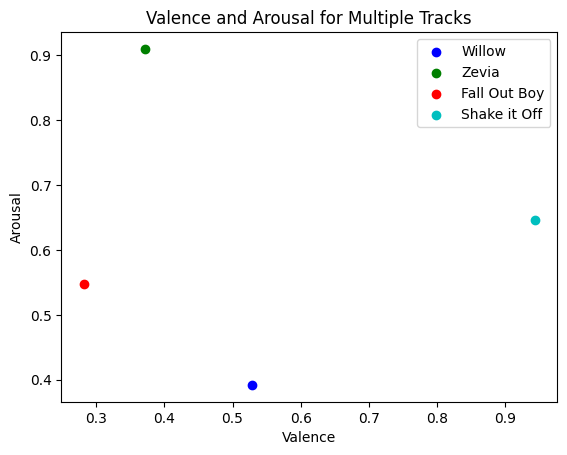

In [14]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Set up Spotify API credentials
client_id = '8a9262cf15dd4e16bd72737b6e6a93ee'
client_secret = '1b7eb12115884c8eb165f3291eaa55c6'
redirect_uri = 'https://en.wikipedia.org/wiki/India'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_id(track_name):
    """Get the Spotify track ID for a given track name."""
    results = sp.search(q='track:' + track_name, type='track')
    return results['tracks']['items'][0]['id']

def get_track_features(track_id):
    """Get the valence and arousal (danceability) for a given track ID."""
    features = sp.audio_features([track_id])
    valence = features[0]['valence']
    arousal = features[0]['danceability']
    return valence, arousal

def plot_valence_arousal(track_names):
    """Plot the valence and arousal for a list of tracks."""
    fig, ax = plt.subplots()
    cursor = mplcursors.cursor(ax)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more than 7 songs

    for i, track_name in enumerate(track_names):
        track_id = get_track_id(track_name)
        valence, arousal = get_track_features(track_id)
        scatter = ax.scatter([valence], [arousal], c=colors[i % len(colors)], label=track_name)

    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_title('Valence and Arousal for Multiple Tracks')
    ax.legend(loc='best')
    plt.show()

track_names = ['Willow', 'Zevia', 'Fall Out Boy', 'Shake it Off']  # Replace with your list of song names
plot_valence_arousal(track_names)
